In [89]:
from functions import uf_1
import numpy as np
from particle import Particle
from typing import List

np.random.seed(1000)
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [90]:
l_bound = np.array([0, 0, 0, 0])
u_bound = np.array([1, 1, 1, 1])
dim = 4

In [93]:
def create_particles(num: int, l_bound: np.array, u_bound: np.array) -> List[Particle]:
    """Creates dict with {particle.id: particle} and initializes them"""
    particles = []
    for i in range(num):
        particle = Particle(id=i, l_bound=l_bound, u_bound=u_bound, dim=dim)
        particle.initialize_position()
        particle.set_cost(f=uf_1)
        particles.append(particle)
    particles = particles
    return particles

def get_all_positions(particles: list[Particle]) -> np.ndarray:
    """Returns all particle positions"""
    solutions = []
    for p in particles:
        solutions.append(p.position)
    return np.array(solutions)

def get_all_costs(particles: list[Particle]) -> np.ndarray:
    """Returns all particle costs"""
    solutions = [p.cost for p in particles]
    return np.array(solutions)

In [96]:
particles = create_particles(num=10, l_bound=l_bound, u_bound=u_bound)

In [99]:
for p in particles:
    print(p)

Particle(velocity=0, 
 position=[0.65358959 0.11500694 0.95028286 0.4821914 ], 
 cost=[1.253080382295542, 0.1923108614867357], dominated=False, 
 trial=0)
Particle(velocity=0, 
 position=[0.87247454 0.21233268 0.04070962 0.39719446], 
 cost=[3.6147449710654618, 1.2848081117792134], dominated=False, 
 trial=0)
Particle(velocity=0, 
 position=[0.2331322  0.84174072 0.20708234 0.74246953], 
 cost=[4.339114863450228, 1.0573445004303914], dominated=False, 
 trial=0)
Particle(velocity=0, 
 position=[0.39215413 0.18225652 0.74353941 0.06958208], 
 cost=[0.5354889750013274, 0.5510938674147652], dominated=False, 
 trial=0)
Particle(velocity=0, 
 position=[0.8853372  0.9526444  0.93114343 0.41543095], 
 cost=[5.5316497555594415, 4.487117065972018], dominated=False, 
 trial=0)
Particle(velocity=0, 
 position=[0.02898166 0.98202748 0.33963768 0.70668719], 
 cost=[0.2596984493936175, 1.3598380328761626], dominated=False, 
 trial=0)
Particle(velocity=0, 
 position=[0.36187707 0.0351059  0.85505825 0

In [100]:
get_all_positions(particles=particles)

array([[0.65358959, 0.11500694, 0.95028286, 0.4821914 ],
       [0.87247454, 0.21233268, 0.04070962, 0.39719446],
       [0.2331322 , 0.84174072, 0.20708234, 0.74246953],
       [0.39215413, 0.18225652, 0.74353941, 0.06958208],
       [0.8853372 , 0.9526444 , 0.93114343, 0.41543095],
       [0.02898166, 0.98202748, 0.33963768, 0.70668719],
       [0.36187707, 0.0351059 , 0.85505825, 0.65725351],
       [0.76568299, 0.55408724, 0.88509294, 0.90419762],
       [0.0104217 , 0.07455674, 0.24462921, 0.13330475],
       [0.6979251 , 0.39820488, 0.88312219, 0.18100751]])

In [101]:
costs = get_all_costs(particles=particles)

In [102]:
costs

array([[1.25308038, 0.19231086],
       [3.61474497, 1.28480811],
       [4.33911486, 1.0573445 ],
       [0.53548898, 0.55109387],
       [5.53164976, 4.48711707],
       [0.25969845, 1.35983803],
       [0.63441223, 0.39846458],
       [4.26366219, 2.89291152],
       [1.40082154, 1.98171027],
       [1.05378303, 0.16993513]])

In [103]:
Particle.check_domination(particles=particles)

In [104]:
idx = []
for i, p in enumerate(particles):
    if not p.dominated:
        idx.append(i)

Text(0, 0.5, 'f(2)(x)')

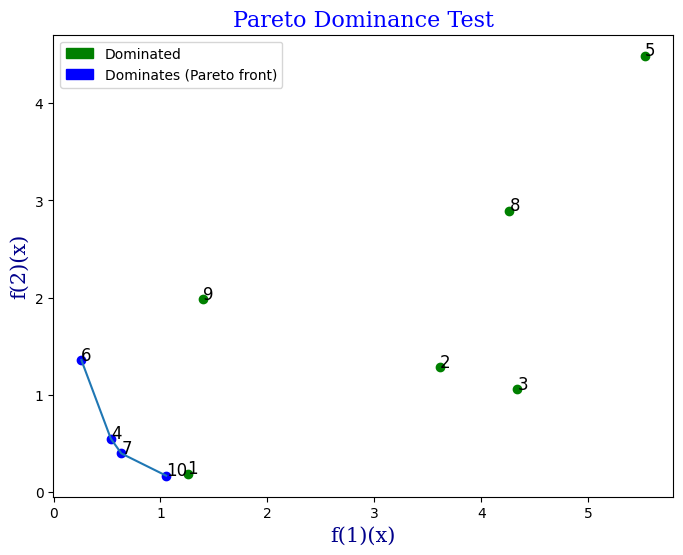

In [105]:
font1 = {'family':'serif','color':'blue','size':16}
font2 = {'family':'serif','color':'darkblue','size':15}

n = [i+1 for i, _ in enumerate(particles)]
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(costs)):
    if i in idx:
        ax.scatter(costs[:, 0][i], costs[:, 1][i], color = 'blue')
    else:
        ax.scatter(costs[:, 0][i], costs[:, 1][i], color = 'green')

for i, txt in enumerate(n):
    ax.annotate(txt, (costs[:, 0][i], costs[:, 1][i]), fontsize=12)

pts_x = [costs[:, 0][i] for i in idx]
pts_y = [costs[:, 1][i] for i in idx]
order = np.argsort(pts_x)
xs = np.array(pts_x)[order]
ys = np.array(pts_y)[order]
plt.plot(xs, ys)

plt.title("Pareto Dominance Test", fontdict=font1)

red_patch = mpatches.Patch(color='green', label='Dominated')
blue_patch = mpatches.Patch(color='blue', label='Dominates (Pareto front)')
plt.legend(handles=[red_patch, blue_patch])

plt.xlabel("f(1)(x)", fontdict=font2)
plt.ylabel("f(2)(x)", fontdict=font2)
